In [35]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("Lab3_adult.csv")

In [38]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [41]:
df1 = pd.DataFrame(data)

In [42]:
print(df1.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [45]:
df1_encoded = pd.get_dummies(df1, columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [46]:
print(df1_encoded.columns)

Index(['age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23',
       'age_24', 'age_25', 'age_26',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=29035)


In [49]:
# Features (X) and target variable (y)
X = df1_encoded.drop(['income_>50K', 'income_<=50K'], axis=1)
y = df1_encoded['income_>50K']  # 1 for >50K, 0 for <=50K

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Print confirmation
print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy) 
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8564847988535162

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91      7431
        True       0.75      0.59      0.66      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



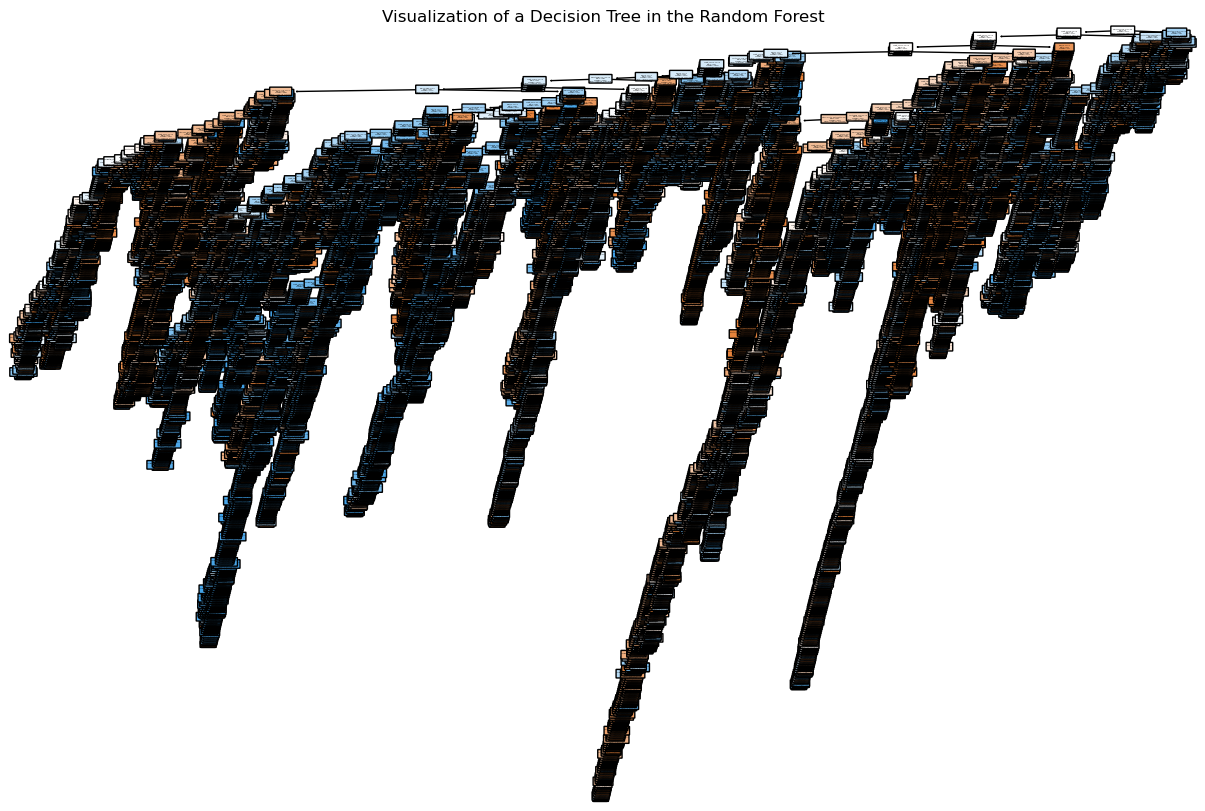

In [52]:
plt.figure(figsize=(15, 10)) 
tree = rf_model.estimators_[0] # Selecting the first tree 
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True) 
plt.title("Visualization of a Decision Tree in the Random Forest") 
plt.show()

## Question-1

A 38-year-old individual, working as a "Farming-fishing" professional, married, working 50 hours per week in the United States. Will this person earn more than $50K annually?

In [124]:
# Define the conditions for each individual
test1_data = pd.DataFrame({
    'age': [38],
    'workclass': ['Private'],
    'fnlwgt': [215646],
    'education': ['HS-grad'],
    'educational-num': [9],
    'marital-status': ['Divorced'],
    'occupation': ['Handlers-cleaners'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Female'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Encode the test data
test_encoded = pd.get_dummies(test1_data, drop_first=True)

# Add missing columns more efficiently
missing_cols = list(set(X.columns) - set(test_encoded.columns))  # Convert set to list
missing_df = pd.DataFrame(0, index=test_encoded.index, columns=missing_cols)

# Concatenate the test_encoded DataFrame with the missing columns
test_encoded = pd.concat([test_encoded, missing_df], axis=1)

# Ensure the order of columns matches the training dataset
test_encoded = test_encoded[X.columns]

# Predict outcomes
predictions = rf_model.predict(test_encoded)

# Interpret results
results = ["Yes" if pred == 1 else "No" for pred in predictions]

# Display results for each case
print(f"{results} (salary greater than $50K)")


['No'] (salary greater than $50K)


## Question -2
### A 28-year-old person with an Associate's degree, working for the local government, spends 40 hours per week at work, with no capital gains or losses. Is this person likely to earn more than $50K annually?

In [122]:
# Define the conditions for each individual
test_data2 = pd.DataFrame({
    'age': [28],
    'workclass': ['Local-gov'],
    'fnlwgt': [0],  # Replace with mean or default value
    'education': ['Assoc-acdm'],
    'educational-num': [0],  # Replace with mean or default value
    'marital-status': ['Never-married'],
    'occupation': ['?'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Encode the test data
test_encoded = pd.get_dummies(test_data2, drop_first=True)

# Add missing columns more efficiently
missing_cols = list(set(X.columns) - set(test_encoded.columns))  # Convert set to list
missing_df = pd.DataFrame(0, index=test_encoded.index, columns=missing_cols)

# Concatenate the test_encoded DataFrame with the missing columns
test_encoded = pd.concat([test_encoded, missing_df], axis=1)

# Ensure the order of columns matches the training dataset
test_encoded = test_encoded[X.columns]

# Predict outcomes
predictions = rf_model.predict(test_encoded)

# Interpret results
results = ["Yes" if pred == 1 else "no" for pred in predictions]

# Display results for each case
print(f"{results} (salary greater than $50K)")


['Yes'] (salary greater than $50K)


## Question - 3
### A 44-year-old private-sector employee with "Some-college" education, working 40 hours per week, and reporting $7,688 in capital gains. Will this individual earn more than $50K? 

In [137]:
# Define the conditions for each individual
test_data3 = pd.DataFrame({
    'age': [44],
    'workclass': ['Private'],
    'fnlwgt': [0],  # Replace with mean or default value
    'education': ['Some-college'],
    'educational-num': [0],  # Replace with mean or default value
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['?'],
    'relationship': ['Husband'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [7688],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Encode the test data
test_encoded = pd.get_dummies(test_data3, drop_first=True)

# Add missing columns more efficiently
missing_cols = list(set(X.columns) - set(test_encoded.columns))  # Convert set to list
missing_df = pd.DataFrame(0, index=test_encoded.index, columns=missing_cols)

# Concatenate the test_encoded DataFrame with the missing columns
test_encoded = pd.concat([test_encoded, missing_df], axis=1)

# Ensure the order of columns matches the training dataset
test_encoded = test_encoded[X.columns]

# Predict outcomes
predictions = rf_model.predict(test_encoded)

# Interpret results
results = ["No" if pred == 1 else "Yes" for pred in predictions]

# Display results for each case
print(f"{results} (salary greater than $50K)")


['Yes'] (salary greater than $50K)


## Question-4
### A 25-year-old Black male working as a "Machine-op-inspct" professional, 40 hours per week, with no reported capital gains or losses. Does this person earn more than $50K annually?


In [132]:
# Define the conditions for each individual
test_data4 = pd.DataFrame({
    'age': [25],
    'workclass': ['Private'],
    'fnlwgt': [0],  # Replace with mean or default value
    'education': ['HS-grad'],
    'educational-num': [0],  # Replace with mean or default value
    'marital-status': ['Never-married'],
    'occupation': ['Machine-op-inspct'],
    'relationship': ['Not-in-family'],
    'race': ['Black'],
    'sex': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Encode the test data
test_encoded = pd.get_dummies(test_data4, drop_first=True)

# Add missing columns more efficiently
missing_cols = list(set(X.columns) - set(test_encoded.columns))  # Convert set to list
missing_df = pd.DataFrame(0, index=test_encoded.index, columns=missing_cols)

# Concatenate the test_encoded DataFrame with the missing columns
test_encoded = pd.concat([test_encoded, missing_df], axis=1)

# Ensure the order of columns matches the training dataset
test_encoded = test_encoded[X.columns]

# Predict outcomes
predictions = rf_model.predict(test_encoded)

# Interpret results
results = ["Yes" if pred == 1 else "No" for pred in predictions]

# Display results for each case
print(f"{results} (salary greater than $50K)")


['No'] (salary greater than $50K)


## Question-5
### An 18-year-old female, native to the United States, with "Some-college" education, working 30 hours per week, in an undefined occupation. Will this individual earn more than $50K annually?

In [135]:
# Define the conditions for each individual
test_data5 = pd.DataFrame({
    'age': [18],
    'workclass': ['?'],
    'fnlwgt': [0],  # Replace with mean or default value
    'education': ['Some-college'],
    'educational-num': [0],  # Replace with mean or default value
    'marital-status': ['Never-married'],
    'occupation': ['?'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Female'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [30],
    'native-country': ['United-States']
})

# Encode the test data
test_encoded = pd.get_dummies(test_data5, drop_first=True)

# Add missing columns more efficiently
missing_cols = list(set(X.columns) - set(test_encoded.columns))  # Convert set to list
missing_df = pd.DataFrame(0, index=test_encoded.index, columns=missing_cols)

# Concatenate the test_encoded DataFrame with the missing columns
test_encoded = pd.concat([test_encoded, missing_df], axis=1)

# Ensure the order of columns matches the training dataset
test_encoded = test_encoded[X.columns]

# Predict outcomes
predictions = rf_model.predict(test_encoded)

# Interpret results
results = ["Yes" if pred == 1 else "No" for pred in predictions]

# Display results for each case
print(f"{results} (salary greater than $50K)")


['No'] (salary greater than $50K)
